# 2014 Crime analysis: a comparison between San Francisco and Seattle.

This small article is about analysis of crimes in Seattle and San Francisco during 2014.
This is part of an assignment of Coursera's: "Communicating Data Science Results" by University of Washington.

I am focusing on this assignment:

"For either city, how do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?"

The dataset used are available at:
https://github.com/uwescience/datasci_course_materials/tree/master/assignment6

The first step is to import data.
I developed thi solution with the help of http://pandas.pydata.org/.
It is easy as:

In [31]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

parser = lambda date: datetime.datetime.strptime(date, "%m/%d/%Y %I:%M:%S %p").time()
sf_df =  pd.read_csv('sanfrancisco_incidents_summer_2014.csv', parse_dates= True, infer_datetime_format=True)
se_df =  pd.read_csv('seattle_incidents_summer_2014.csv', parse_dates=['Occurred Date or Date Range Start'], date_parser=parser,  infer_datetime_format=True)


Populating the interactive namespace from numpy and matplotlib


Note: parser is useful to parse times in seattle dataset.

## How do incidents vary by time of day?

### SAN FRANCISCO

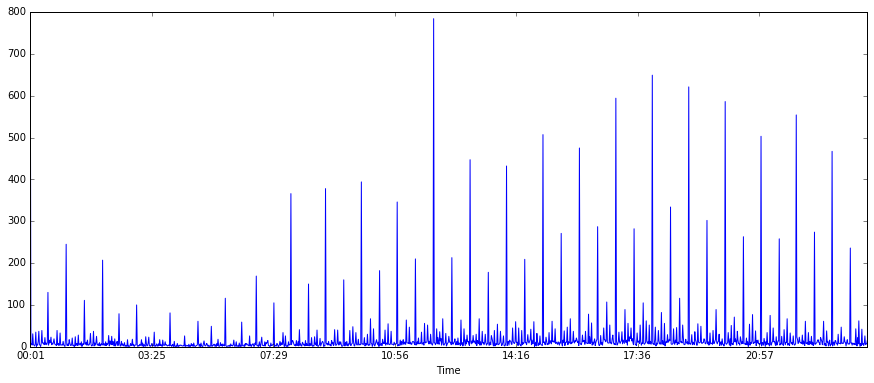

In [32]:
sf_grouped = sf_df.groupby('Time')
sf_time_sum = sf_grouped.size()
sf_time_sum.plot()
plt.show()

### SEATTLE

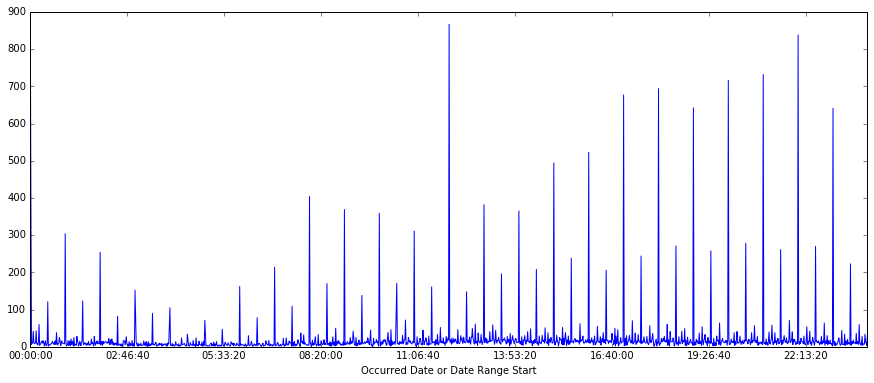

In [33]:
se_grouped = se_df.groupby('Occurred Date or Date Range Start')
se_time_sum = se_grouped.size()
se_time_sum.plot()
plt.show()


Tha distribution of crimes during the day is quite the same for both the cities. As you can see there is a peak at late morning. Then, during the evening, the trend for S.Francisco and Seattle is slightly different.

##  Which incidents are most common in the evening?

### SAN FRANCISCO

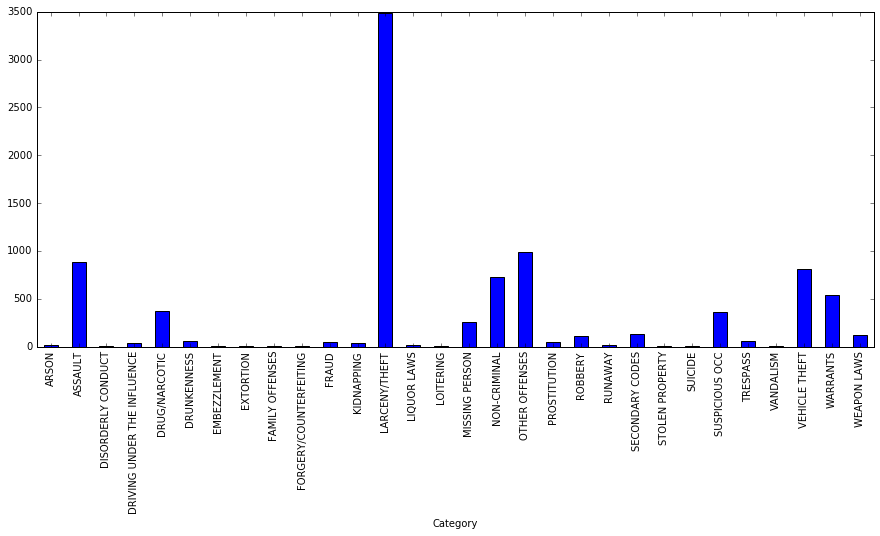

In [34]:
mask = (sf_df.Time > '18:00' )
df_masked = sf_df[mask]
df_masked = df_masked.groupby('Category').size()
df_masked.plot(kind='bar')
plt.show()

### SEATTLE

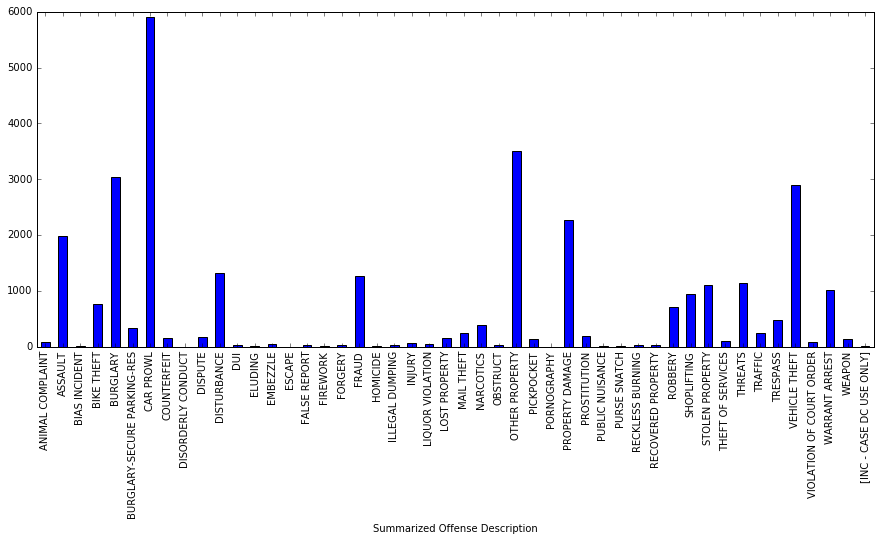

In [35]:
mask = (se_df['Occurred Date or Date Range Start'] > datetime.datetime.strptime('18:00', '%M:%S').time() )
de_masked = se_df[mask]
de_masked = de_masked.groupby('Summarized Offense Description').size()
de_masked.plot(kind='bar')
plt.show()

Here is clear: after 18:00, Larcenies are by far the most frequent in San Francisco, as well as Car Prowl is the most frequent crime in Seattle

## During what periods of the day are robberies most common?

### SAN FRANCISCO

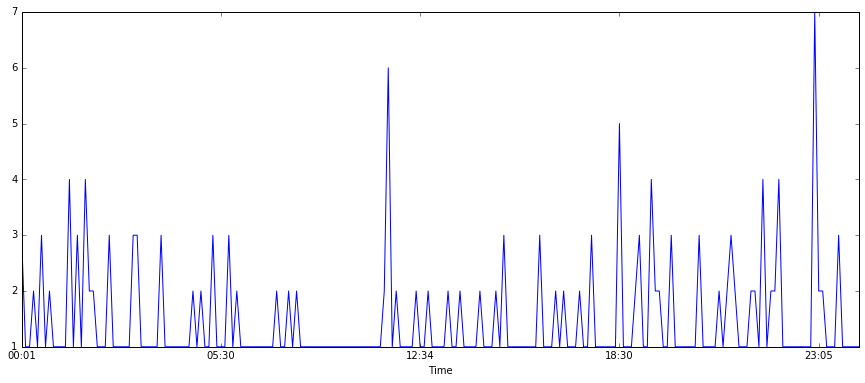

In [36]:
mask2 = (sf_df.Category == "ROBBERY")
df_masked2 = sf_df[mask2]
df_masked2 = df_masked2.groupby('Time').size()
df_masked2.plot()
plt.show()

### SEATTLE

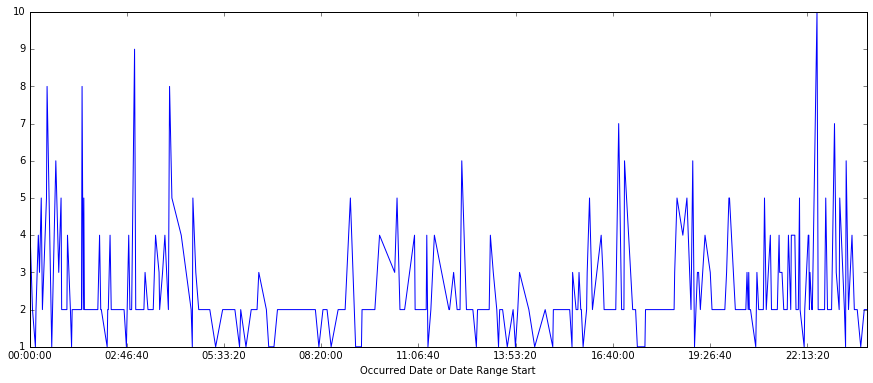

In [37]:
mask2 = (se_df['Summarized Offense Description'] == "ROBBERY")
de_masked2 = se_df[mask2]
de_masked2 = de_masked2.groupby('Occurred Date or Date Range Start').size()
de_masked2.plot()
plt.show()

The results for Robberies are quite show that the trend is the same for the two cities, even if with different scale:
The crimes increase in the afternoon and reach a peak in the evening, keeping an high value during the night and very early morning.
There is only one difference: in San Francisco there is a peak at morning (more or less at 11:00).
The robberies in Seattle are more frequent than in San Francisco.
